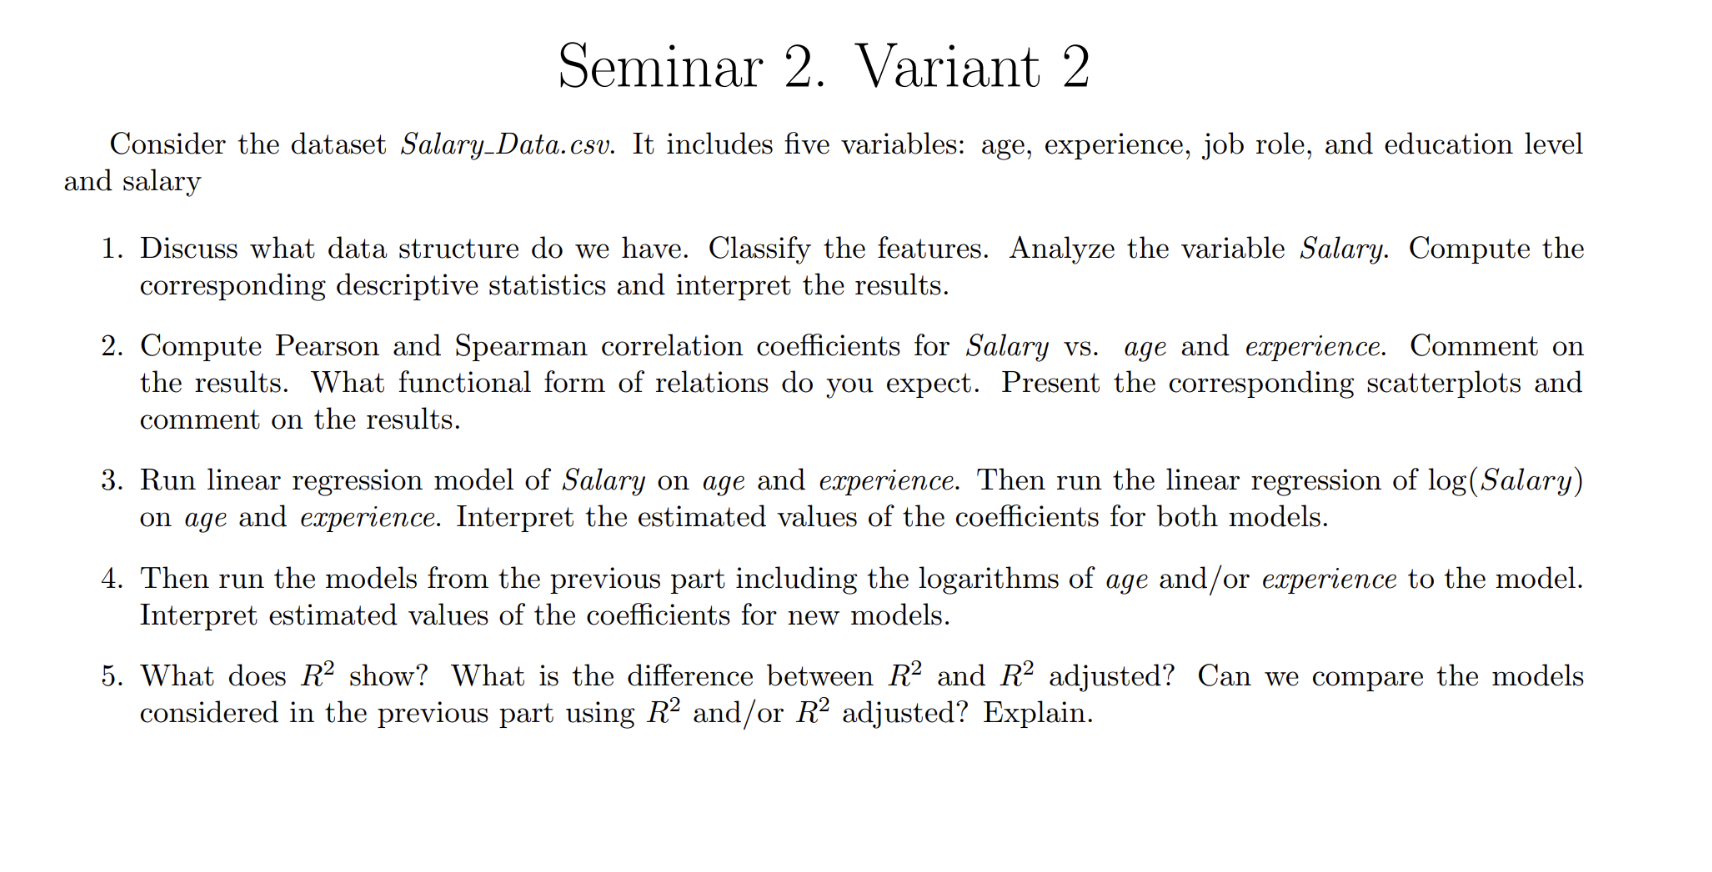

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [149]:
salary_data = pd.read_csv('Salary_Data 1.csv')
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Here we have cross-sectional data structure, because it's tied with point in time.

1. Variable Classification

| Variable                                | Data Scale | Classification | Explanation |
|-----------------------------------------|------------|---------------|-------------|
| **age (in years)**                      | ratio      | quantitative  | The age is measured in years. If the age is zero, it means no age in year (small baby). This variable has zero measurement, indicating a lack of the characteristic. It is quantitative because its realizations reflect both differences and magnitudes. |
| **Gender**                    | nominal    | qualitative   | A categorical variable indicating person is gender. It does not allow for meaningful numerical comparisons beyond equality or inequality. It is qualitative, as it describes a personal attribute — gender.  |
| **Education level** | ratio      | quantitative  | This variable has a true zero, meaning that if sleep time is zero, the person did not sleep at all. It is quantitative since its realizations reflect both differences and magnitudes. |
| **Job title** | ratio      | quantitative  | This variable has a true zero, meaning that if sleep time is zero, the person did not sleep at all. It is quantitative since its realizations reflect both differences and magnitudes. |
| **Education level** | ordinal      | quantitative  | It is ordinanl, bacause we can range our data such Bachelor's, Master's etc.|
| **Years of Experience** | ratio      | quantitative  | This variable has a true zero, representing a complete lack of experience. It is quantitative since its realizations reflect both differences and magnitudes.  |
| **Salary** | ratio      | quantitative  | This variable has a true zero, meaning that person doesn't aern any money. It is quantitative since its realizations reflect both differences and magnitudes. |

In [150]:
salary_data_cleaned = salary_data.dropna()
salary_feature = salary_data_cleaned['Salary']
salary_feature

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6698, dtype: float64

In [169]:
location_measures= {"Mean": round(float(salary_feature.mean()), 2),
                     "Median": round(float(salary_feature.median()), 2),
                     "Lower quartile": round(float(salary_feature.quantile(0.25)), 2),
                     "Upper quartile": round(float(salary_feature.quantile(0.75)), 2),
                     "Lower quantile (5%)": round(float(salary_feature.quantile(0.05)), 2),
                     "Upper quantile (5%)": round(float(salary_feature.quantile(0.95)), 0)
                     }

# upper_and_lower_5_quanlile = {}
# location_measures
df = pd.DataFrame(list(location_measures.items()), columns=["Measure", "Value"])

df.style

,Measure,Value
0,Mean,115329.250000
1,Median,115000.000000
2,Lower quartile,70000.000000
3,Upper quartile,160000.000000
4,Lower quantile (5%),35000.000000
5,Upper quantile (5%),195000.000000


- The mean salary represents the average salary earned by individuals in the dataset. It is not very representative, because it's sensitive to outliers (extreme values), meaning that if there are very high wages, they can push the mean upwards. In this case, the mean salary is 115,329, which not really higher than what most people actually earn.

- The median salary (50%-quantile) is the middle value in the dataset, meaning 50% of individuals earn less than this amount and 50% earn more. The median is 115,000, there no big differerence between mean and median. Meaning that both the mean and median give a good representation of the "typical" salary in this dataset.

- The lower quartile (25th percentile) is 70,000, meaning that 25% of workers earn less than this amount. Similarly, the upper quartile (75th percentile) is 160,000, meaning that 75% of individuals earn below this amount. These quartiles help describe the spread of salaries.

- The 5th percentile (Lower 5%-Quantile) is 35,000, indicating that 5% of workers earn below this amount. This represents the lowest-paid individuals in the dataset. The 95th percentile (Upper 5%-Quantile) is 195,000, meaning 5% of individuals earn above this salary, representing the highest-paid individuals, , who earn significantly more than the median.

In [152]:
measures_of_variation = {"range": round(float(salary_feature.max() - salary_feature.min()), 2),
                         "Interquartile range": round(float(location_measures["Upper quartile"] - location_measures["Lower quartile"]), 2),
                         "Variance": round(float(salary_feature.var()), 2)}

measures_of_variation

{'range': 249650.0, 'Interquartile range': 90000.0, 'Variance': 2786762192.93}

In [153]:
pearson_corr = salary_data_cleaned[['Salary', 'Age', 'Years of Experience']].corr(method='pearson').round(2).iloc[:1]
spearman_corr = salary_data_cleaned[['Salary', 'Age', 'Years of Experience']].corr(method='spearman').round(2).iloc[:1]
print("Pearson correlation coefficients:\n", pearson_corr)
print("\nSpearman correlation coefficients:\n", spearman_corr)

Pearson correlation coefficients:
         Salary   Age  Years of Experience
Salary     1.0  0.73                 0.81

Spearman correlation coefficients:
         Salary   Age  Years of Experience
Salary     1.0  0.75                 0.86


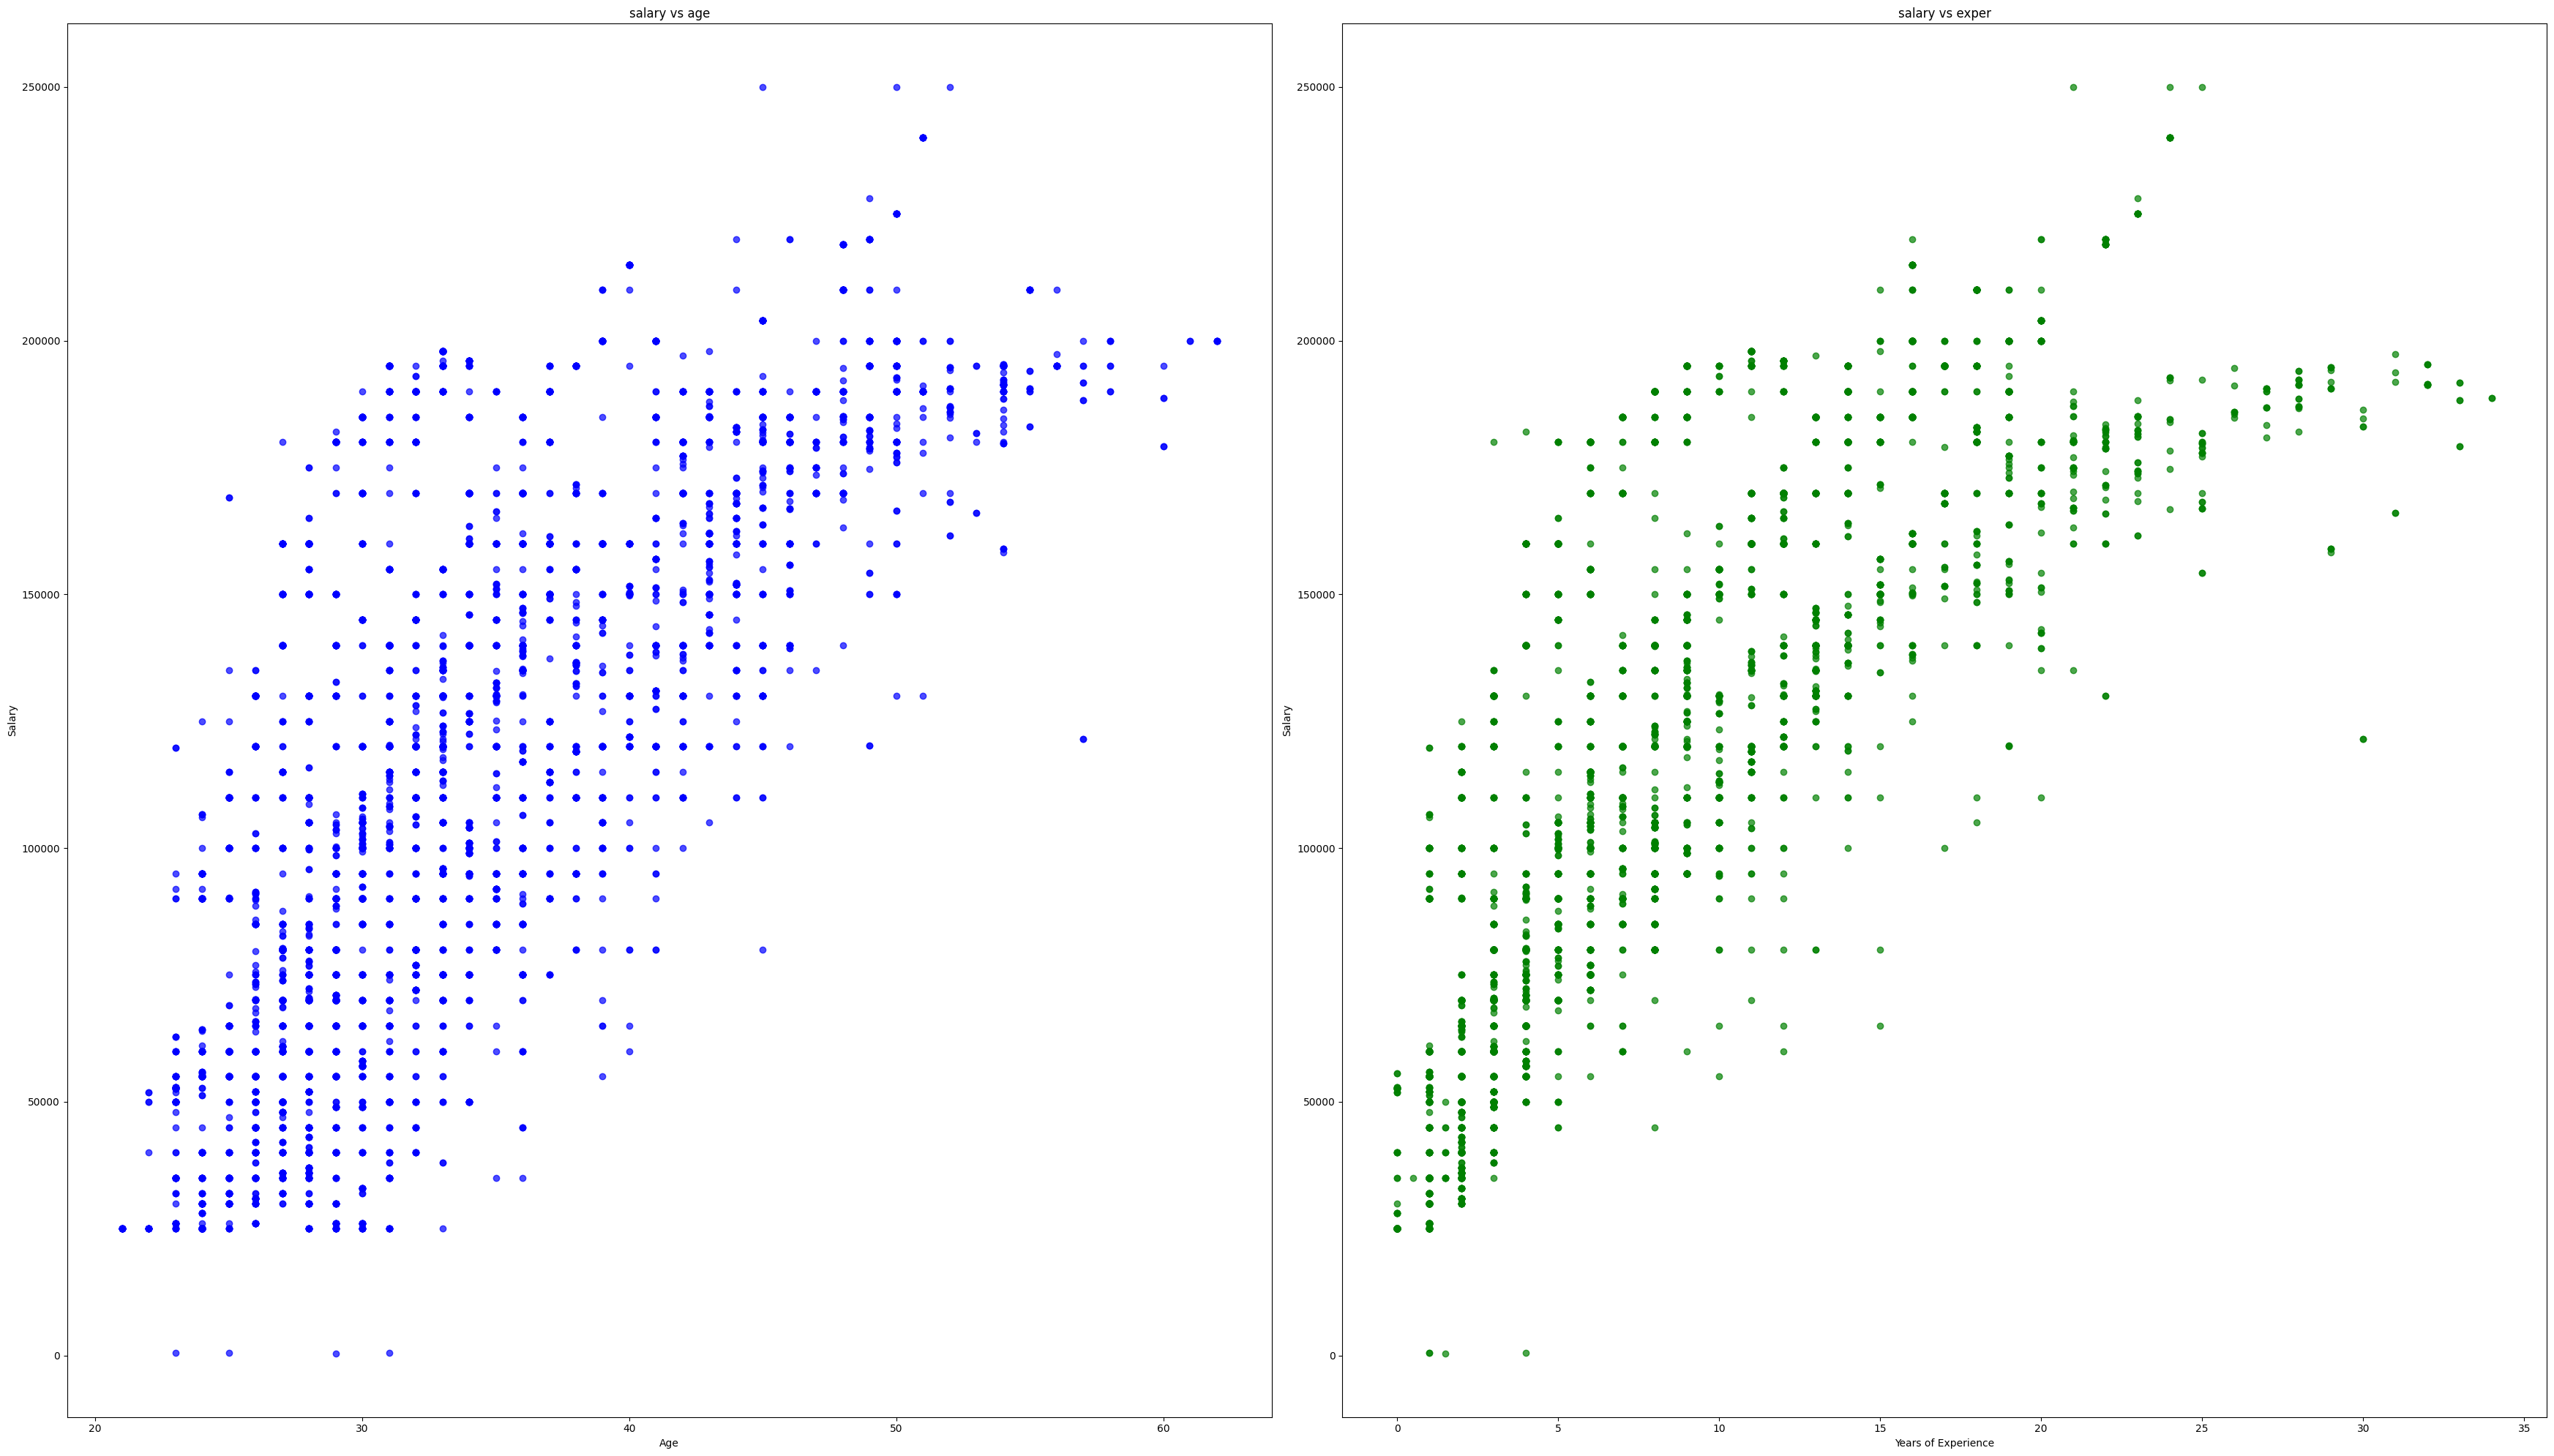

In [154]:
fig, axs = plt.subplots(1, 2, figsize=(35, 20))

axs[0].scatter(salary_data_cleaned['Age'], salary_data_cleaned['Salary'], color='blue', alpha=0.7)
axs[0].set_title('salary vs age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Salary')

axs[1].scatter(salary_data_cleaned['Years of Experience'], salary_data_cleaned['Salary'], color='green', alpha=0.7)
axs[1].set_title('salary vs exper')
axs[1].set_xlabel('Years of Experience')
axs[1].set_ylabel('Salary')

plt.tight_layout()
plt.show()

In [155]:
x = salary_data_cleaned[['Age']]
x1 = salary_data_cleaned[['Years of Experience']]
y = salary_data_cleaned['Salary']

model = LinearRegression()
model1 = LinearRegression()

model.fit(x, y)
model1.fit(x1, y)

y_pred = model.predict(x)
y1_pred = model1.predict(x1)


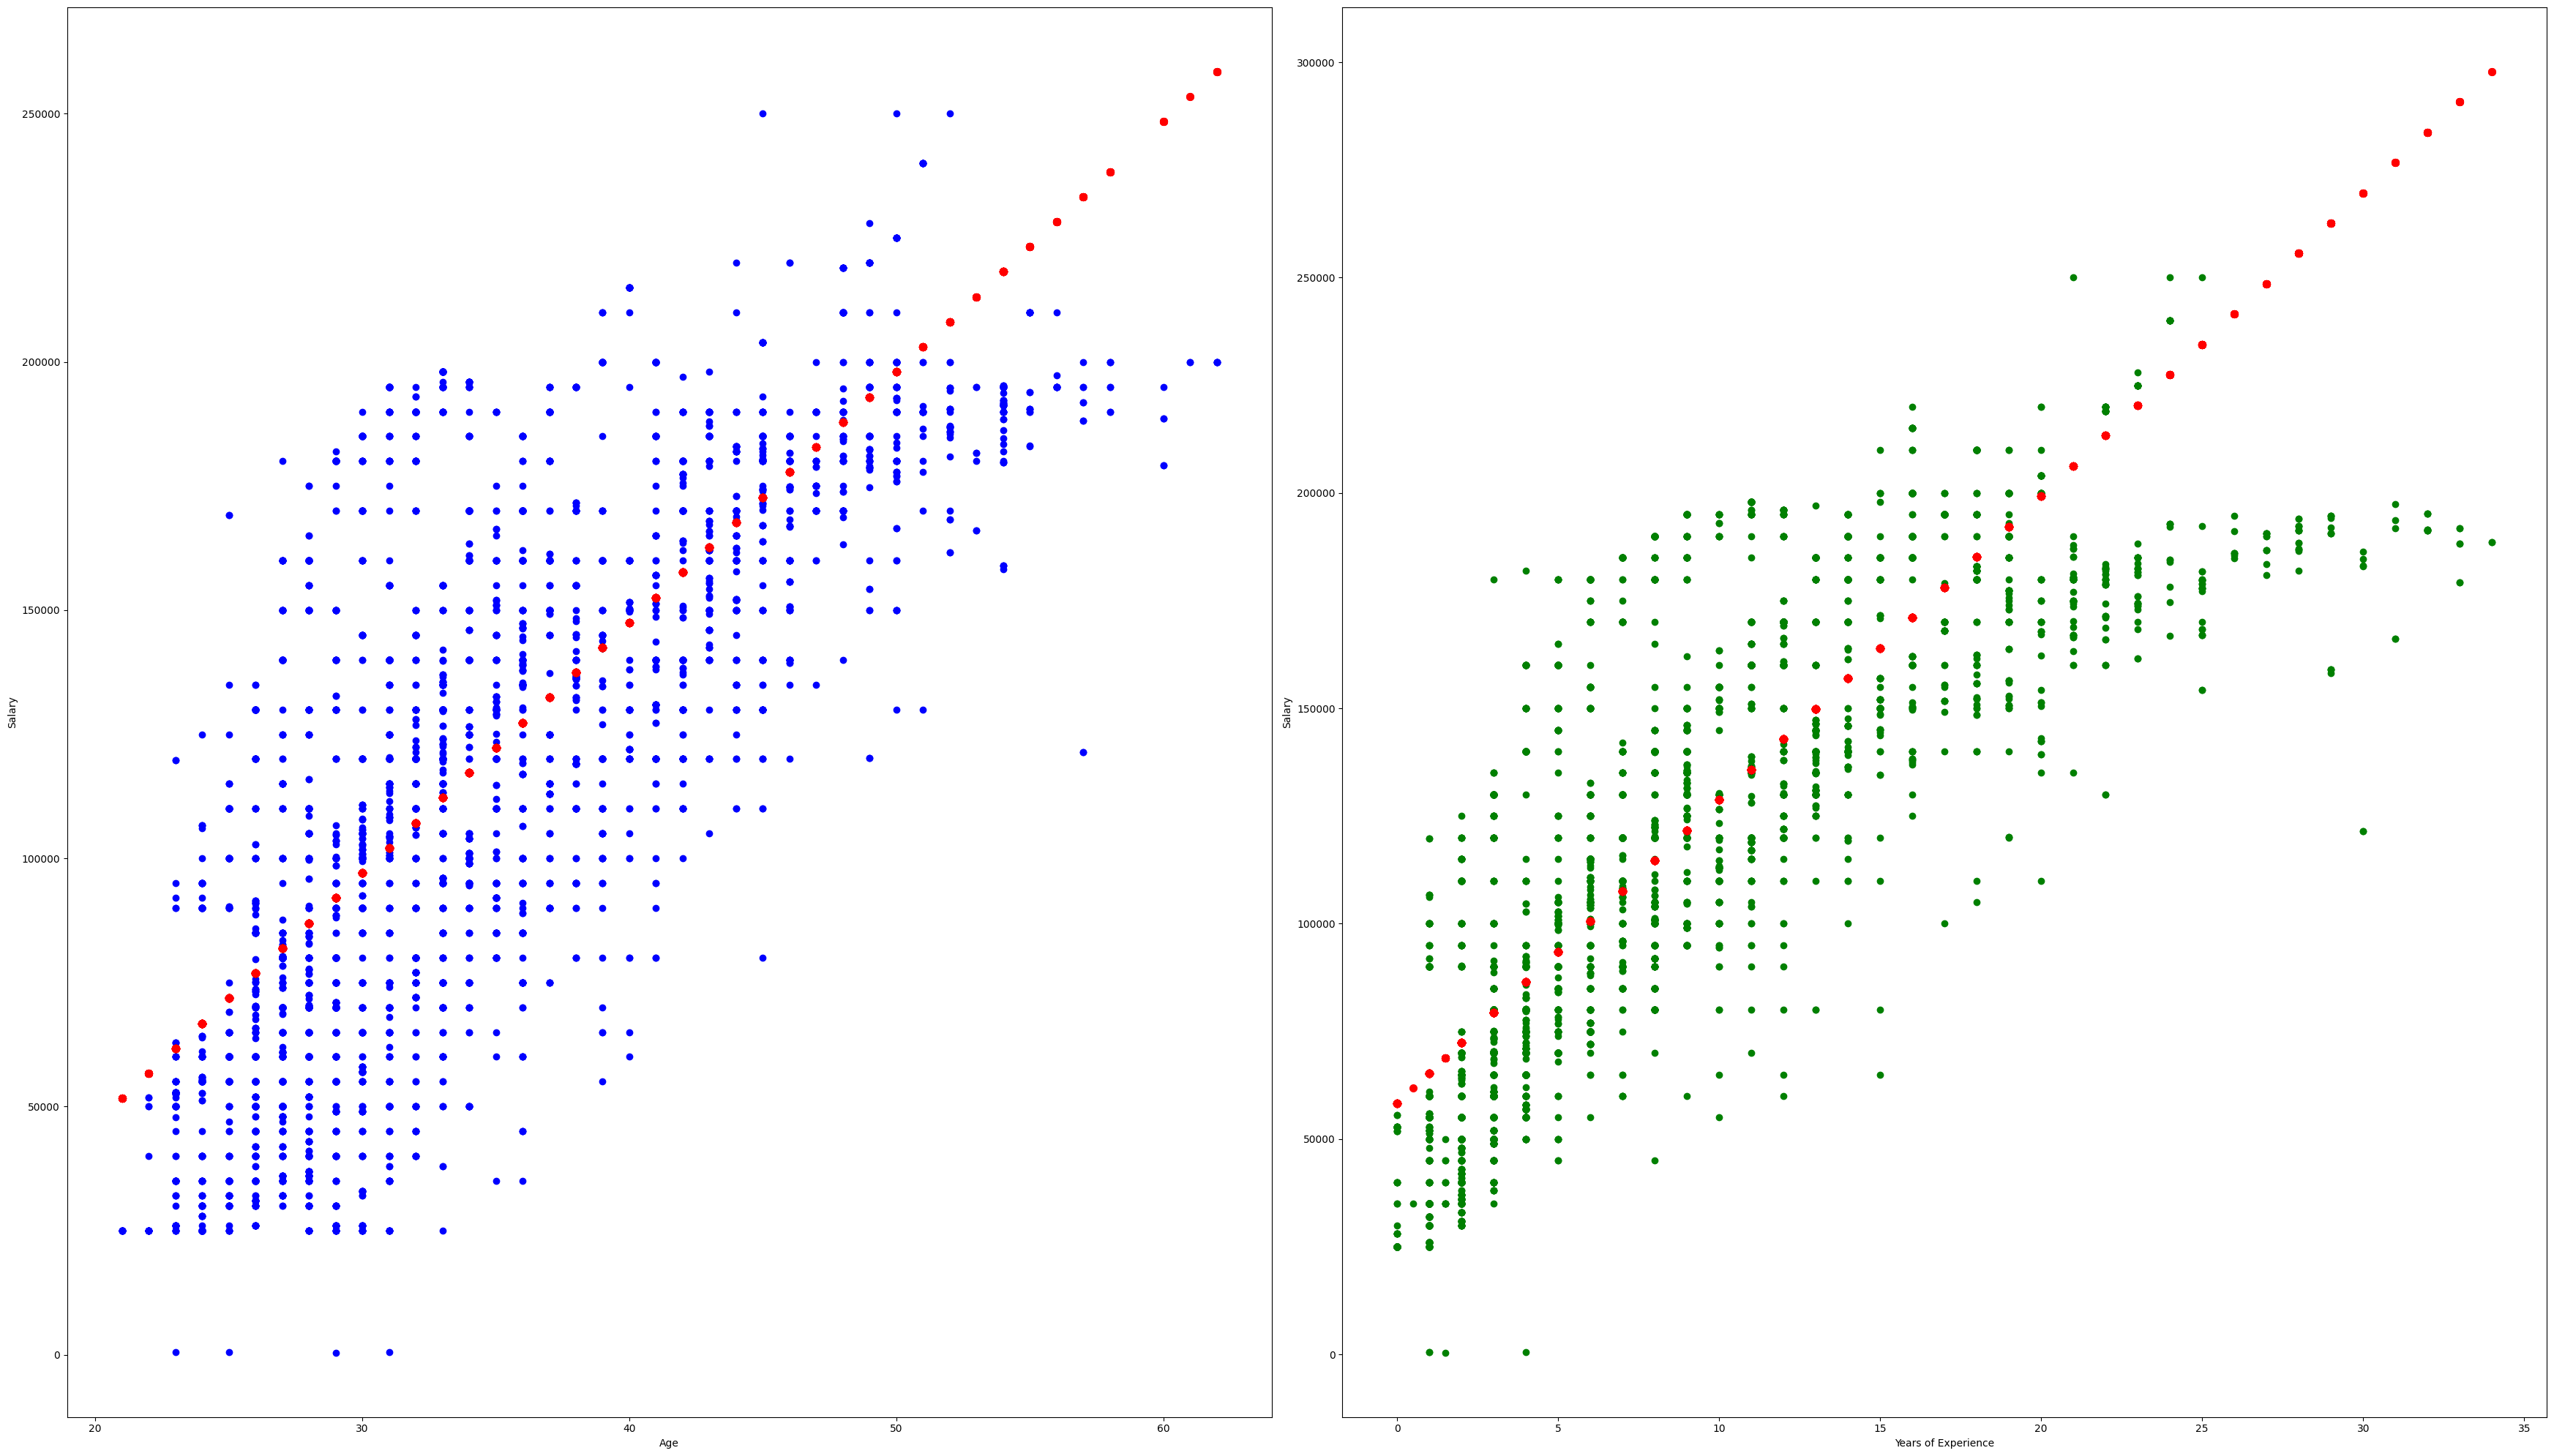

In [156]:
fig, axs = plt.subplots(1, 2, figsize=(35, 20))
axs[0].scatter(x, y, color='blue', label='Actual Data')
axs[0].scatter(x, y_pred, color='red', linewidth=2, label='Regression Line')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Salary')

axs[1].scatter(x1, y, color='green', label='Actual Data')
axs[1].scatter(x1, y1_pred, color='red', linewidth=2, label='Regression Line')
axs[1].set_xlabel('Years of Experience')
axs[1].set_ylabel('Salary')

plt.tight_layout()
plt.show()

In [157]:
print(f"model_coeff(age, salary) = {model.coef_[0]}")
print(f"model1_coeff(exper, salary) = {model1.coef_[0]}")


model_coeff(age, salary) = 5046.646365258147
model1_coeff(exper, salary) = 7046.7344565484


In [158]:
r2_model = model.score(x, y)
r2_model1 = model1.score(x1, y)

print(f"R² model(age, salary): {r2_model}")
print(f"R² model(age, exper): {r2_model1}")


R² model(age, salary): 0.5300722804270507
R² model(age, exper): 0.6544294992867405


In [159]:
salary_data_cleaned = salary_data_cleaned.copy()
salary_data_cleaned[['Age', 'Years of Experience', 'Salary']] = salary_data_cleaned[['Age', 'Years of Experience', 'Salary']].replace(0, 0.01)


# x = salary_data_cleaned[['Age']]
# x1 = np.log(salary_data_cleaned[['Years of Experience']])
y = np.log(salary_data_cleaned['Salary'])

model = LinearRegression()
model1 = LinearRegression()

model.fit(x, y)
model1.fit(x1, y)

y_pred = model.predict(x)
y1_pred = model1.predict(x1)

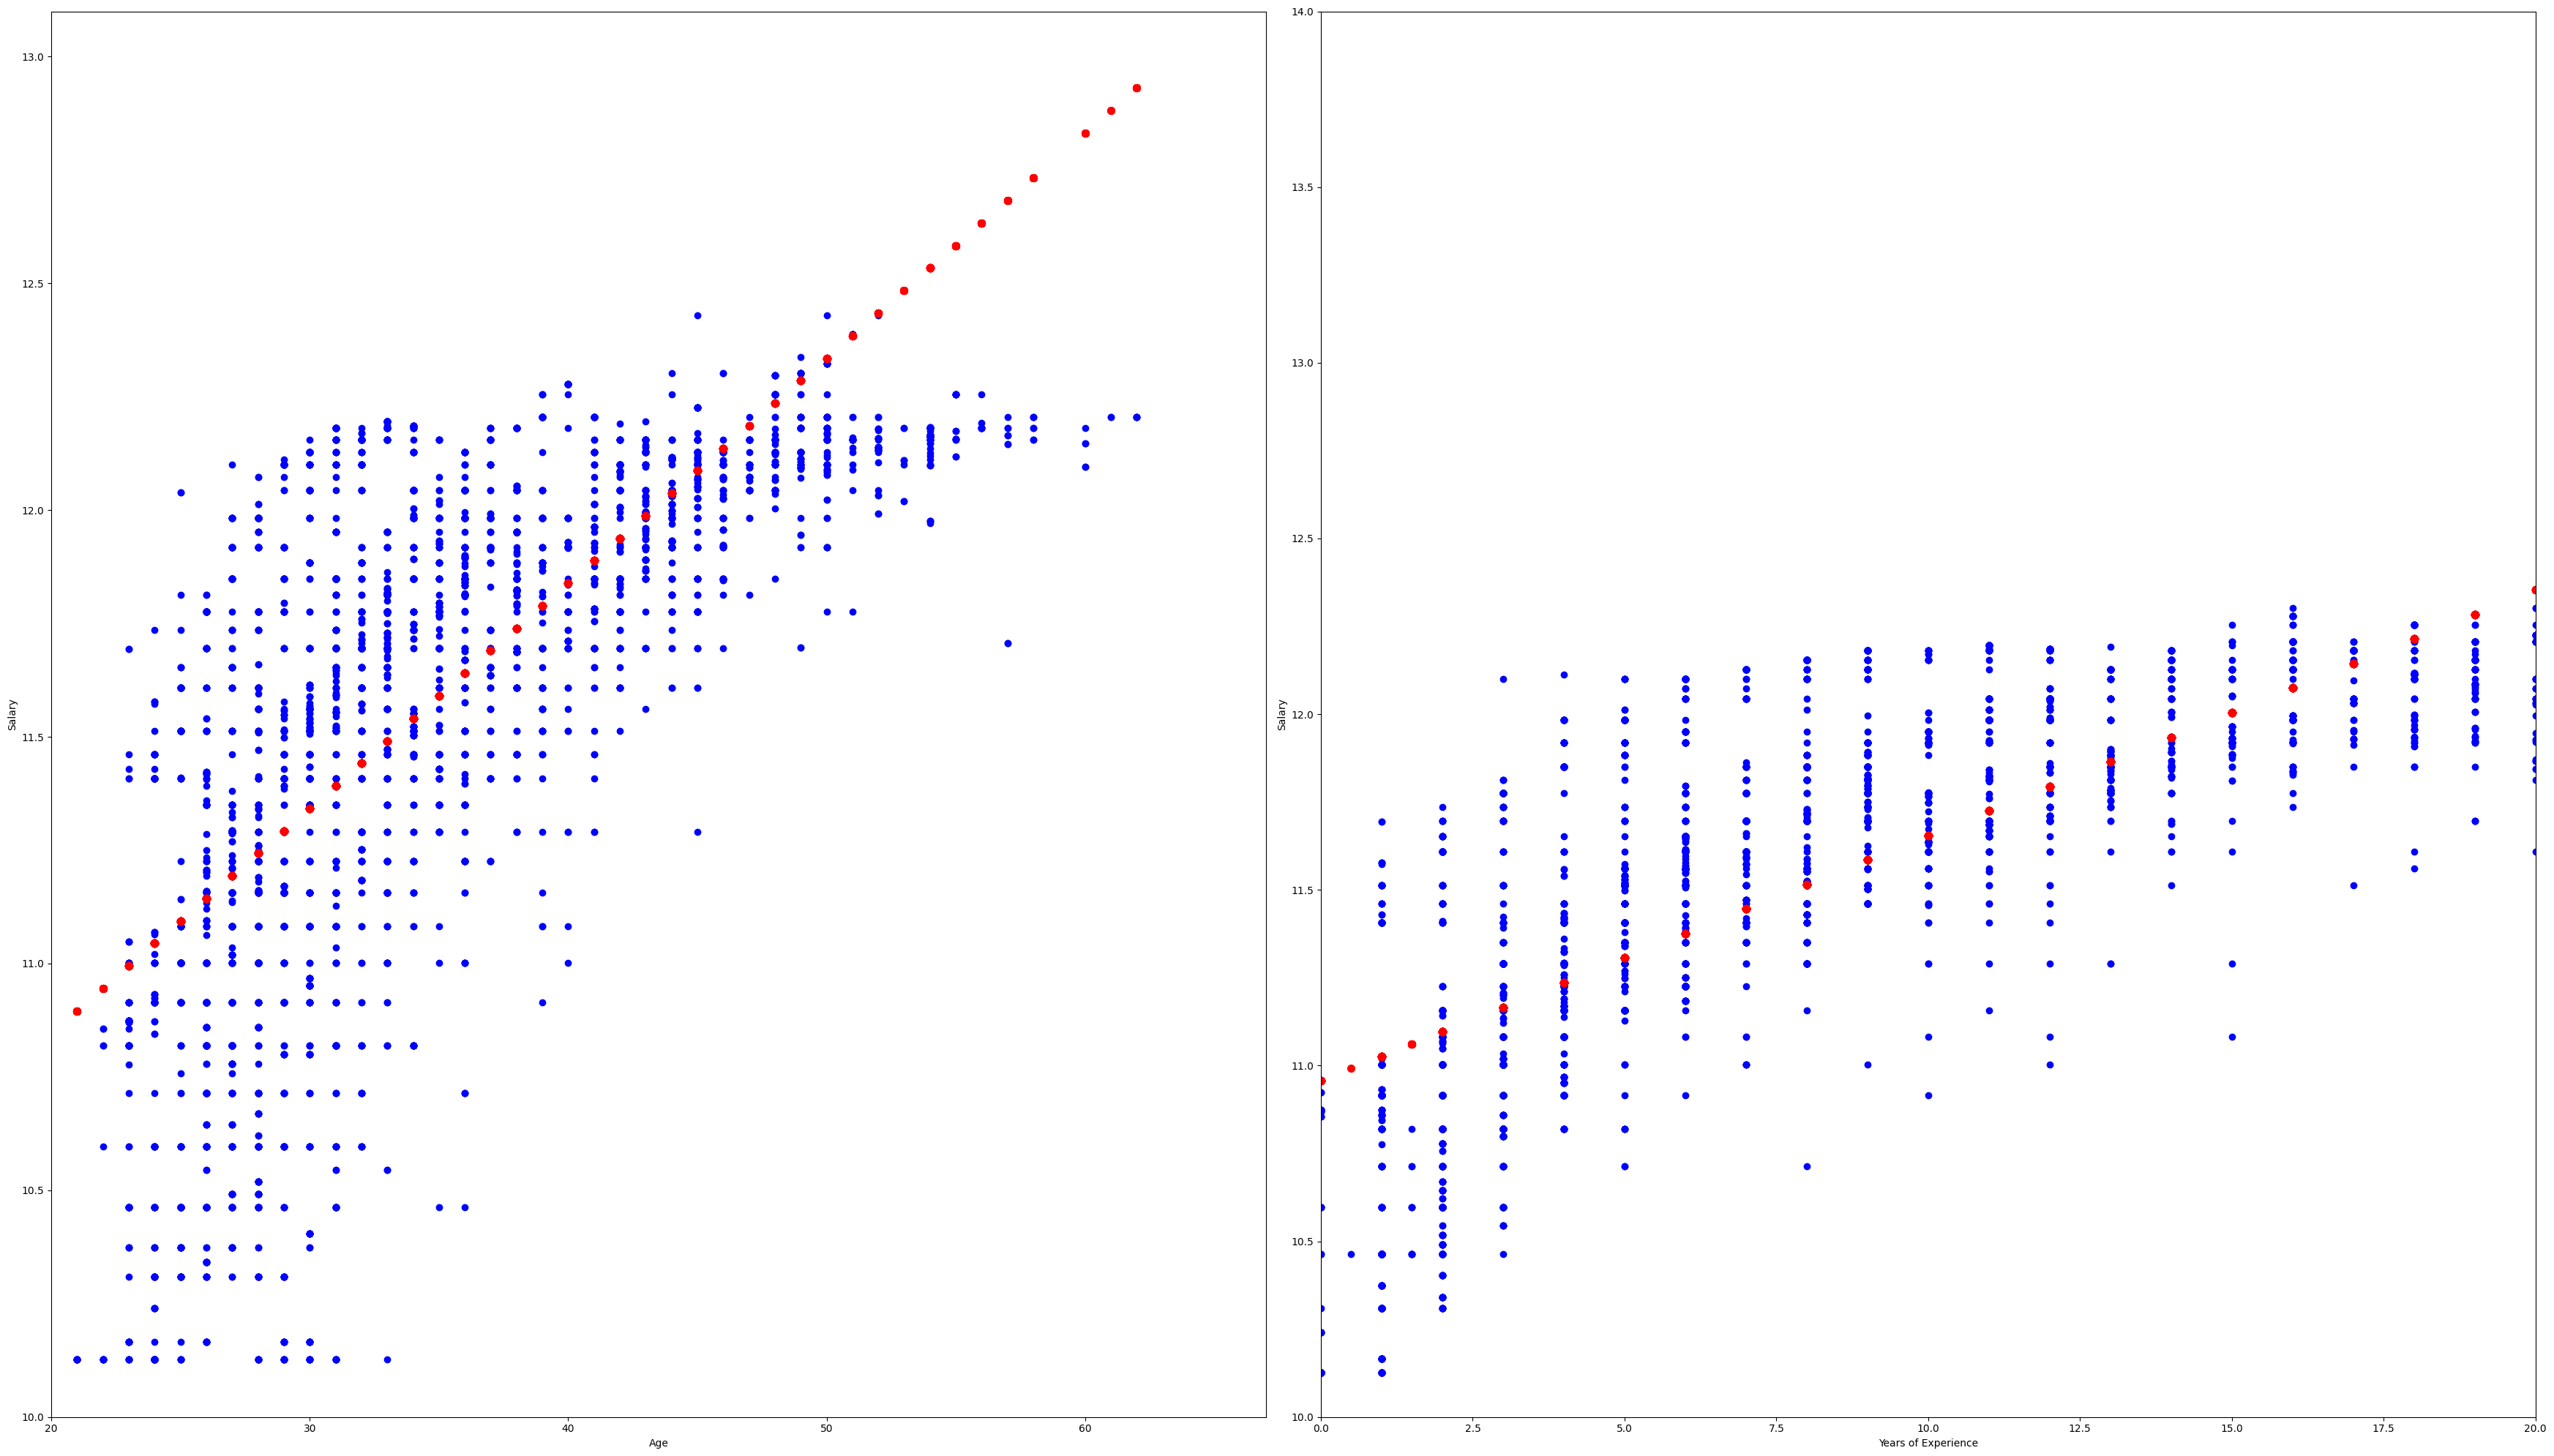

In [160]:
fig, axs = plt.subplots(1, 2, figsize=(35, 20))
# plt.ylim(ymin = 10)
axs[0].scatter(x, y, color='blue', label='Log data')
axs[0].scatter(x, y_pred, color='red', linewidth=2, label='Regression Line')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Salary')
axs[0].set_xlim(20, 67)
axs[0].set_ylim(10, 13.1)

axs[1].scatter(x1, y, color='blue', label='Log data')
axs[1].scatter(x1, y1_pred, color='red', linewidth=2, label='Regression Line')
axs[1].set_xlabel('Years of Experience')
axs[1].set_ylabel('Salary')
axs[1].set_xlim(0, 20)  
axs[1].set_ylim(10, 14)

plt.tight_layout()
plt.show()

In [161]:
print(f"model_coeff(age, salary) = {model.coef_[0]}")
print(f"model1_coeff(exper, salary) = {model1.coef_[0]}")

model_coeff(age, salary) = 0.04963887188024348
model1_coeff(exper, salary) = 0.06983313775501662


In [162]:
# salary_data_cleaned = salary_data_cleaned.copy()
# salary_data_cleaned[['Age', 'Years of Experience', 'Salary']] = salary_data_cleaned[['Age', 'Years of Experience', 'Salary']].replace(0, 0.01)


x = np.log(salary_data_cleaned[['Age']])
x1 = np.log(salary_data_cleaned[['Years of Experience']])
y = np.log(salary_data_cleaned['Salary'])

model = LinearRegression()
model1 = LinearRegression()

model.fit(x, y)
model1.fit(x1, y)

y_pred = model.predict(x)
y1_pred = model1.predict(x1)

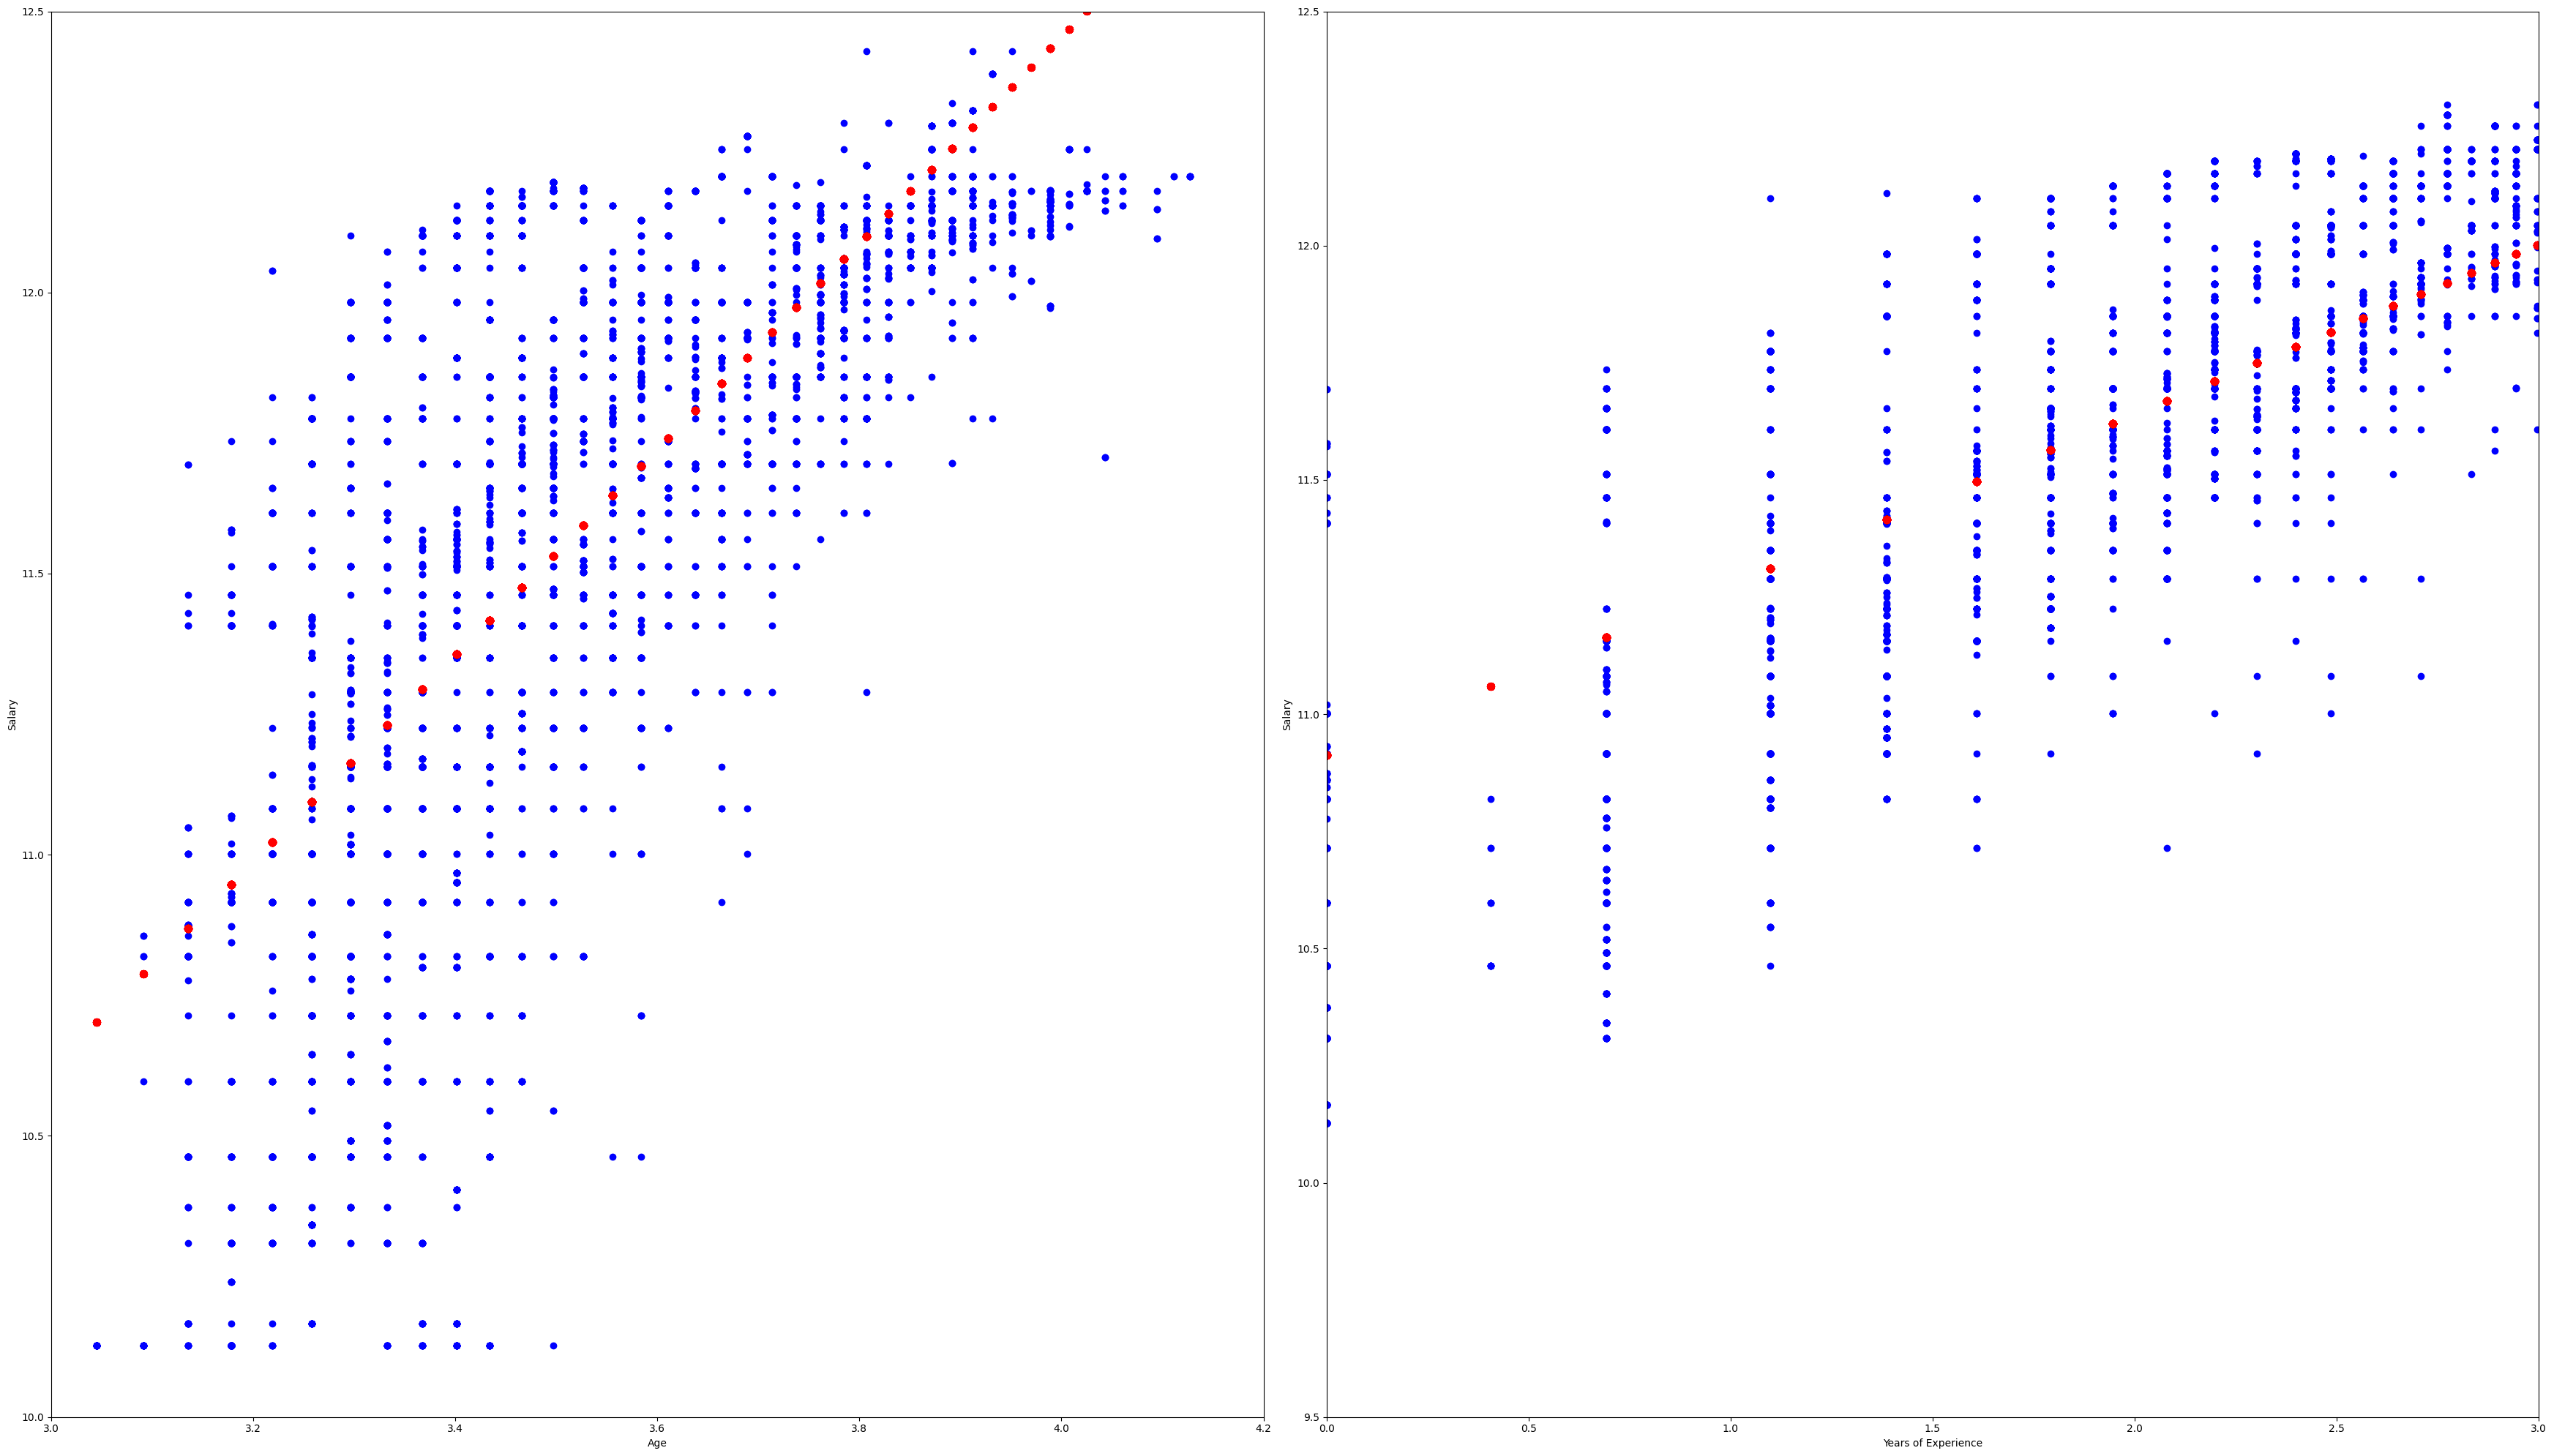

In [163]:
fig, axs = plt.subplots(1, 2, figsize=(35, 20))
# plt.ylim(ymin = 10)
axs[0].scatter(x, y, color='blue', label='Log data')
axs[0].scatter(x, y_pred, color='red', linewidth=2, label='Regression Line')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Salary')
axs[0].set_xlim(3, 4.2)  # Adjust to remove whitespace
axs[0].set_ylim(10, 12.5)

axs[1].scatter(x1, y, color='blue', label='Log data')
axs[1].scatter(x1, y1_pred, color='red', linewidth=2, label='Regression Line')
axs[1].set_xlabel('Years of Experience')
axs[1].set_ylabel('Salary')
axs[1].set_xlim(0, 3)  # Adjust based on actual range
axs[1].set_ylim(9.5, 12.5)

plt.tight_layout()
plt.show()

In [164]:
print(f"model_coeff(log(age), log(salary)) = {model.coef_[0]}")
print(f"model1_coeff(log(exper), log(salary)) = {model1.coef_[0]}")

model_coeff(log(age), log(salary)) = 1.833587930964464
model1_coeff(log(exper), log(salary)) = 0.36363227256655206


In [165]:
r2_model = model.score(x, y)
r2_model1 = model1.score(x1, y)

print(f"R² model(age, salary): {r2_model}")
print(f"R² model(age, exper): {r2_model1}")

R² model(age, salary): 0.4864034106678605
R² model(age, exper): 0.6071017116730719
